# **Tarea 2: Classificación del dataset Iris usando KNN y Regresión Logística**

**La regresión logística**, a pesar de su nombre, es un modelo lineal para clasificación en lugar de regresión. La regresión logística también se conoce en la literatura como regresión logit, clasificación de máxima entropía (MaxEnt) o clasificador logarítmico lineal. En este modelo, las probabilidades que describen los posibles resultados de un solo ensayo se modelan utilizando una función logística.

> --------------------------------------------------------------------



La regresión logística se implementa en LogisticRegression. Esta implementación puede adaptarse a la regresión logística binaria, uno contra el resto o multinomial con opción o regularización Elastic-Net

> --------------------------------------------------------------------




 **La clasificación basada en vecinos** es un tipo de aprendizaje basado en instancias o aprendizaje no generalizador: no intenta construir un modelo interno general, sino que simplemente almacena instancias de los datos de entrenamiento. La clasificación se calcula a partir de un voto de mayoría simple de los vecinos más cercanos de cada punto: a un punto de consulta se le asigna la clase de datos que tiene la mayor cantidad de representantes dentro de los vecinos más cercanos del punto.

> --------------------------------------------------------------------



scikit-learn implementa dos clasificadores de vecinos más cercanos diferentes: KNeighborsClassifier implementa el aprendizaje basado en los vecinos más cercanos de cada punto de consulta, donde es un valor entero especificado por el usuario. RadiusNeighborsClassifier implementa el aprendizaje basado en la cantidad de vecinos dentro de un radio fijo de cada punto de entrenamiento, donde es un valor de punto flotante especificado por el usuario.

> --------------------------------------------------------------------

**Atención**: Este notebook implementa local mente el data set Iris.csv Cree la carpeta en su drive y adjunte el dataset. O suba el dataset directamente a este colab en la celda de cargar dataset.


Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
    :Class Distribution: 33.3% for each of 3 classes.
    :Creator: R.A. Fisher
    :Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
    :Date: July, 1988

  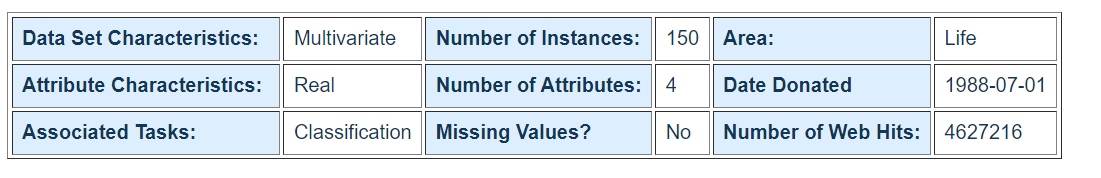

The famous Iris database, first used by Sir R.A. Fisher. The dataset is taken
from Fisher's paper. Note that it's the same as in R, but not as in the UCI
Machine Learning Repository, which has two wrong data points.

This is perhaps the best known database to be found in the
pattern recognition literature.  Fisher's paper is a classic in the field and
is referenced frequently to this day.  (See Duda & Hart, for example.)  The
data set contains 3 classes of 50 instances each, where each class refers to a
type of iris plant.  One class is linearly separable from the other 2; the
latter are NOT linearly separable from each other.

.. topic:: References

   - Fisher, R.A. "The use of multiple measurements in taxonomic problems"
     Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to
     Mathematical Statistics" (John Wiley, NY, 1950).
   - Duda, R.O., & Hart, P.E. (1973) Pattern Classification and Scene Analysis.
     (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   - Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
     Structure and Classification Rule for Recognition in Partially Exposed
     Environments".  IEEE Transactions on Pattern Analysis and Machine
     Intelligence, Vol. PAMI-2, No. 1, 67-71.
   - Gates, G.W. (1972) "The Reduced Nearest Neighbor Rule".  IEEE Transactions
     on Information Theory, May 1972, 431-433.
   - See also: 1988 MLC Proceedings, 54-64.  Cheeseman et al"s AUTOCLASS II
     conceptual clustering system finds 3 classes in the data.
   - Many, many more ...

##Importing Libraries

In [ ]:
# Importamos las bibliotecas necesarias para el laboratorio entre ellas pandas, seaborn, y sklearn etc.
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from sklearn.linear_model import LogisticRegression

##Loading Dataset

In [ ]:
#Montando carpeta de drive para cargar el dataset
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Utilizamos la función read de csv para leer el dataset
iris_dataset = pd.read_csv("/content/drive/MyDrive/Iris-dataset/Iris.csv")


In [ ]:
#Imprimimos las primeras 5 filas del data set
display(iris_dataset.head())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1000,3.5000,1.4000,0.2000,Iris-setosa
1,2,4.9000,3.0000,1.4000,0.2000,Iris-setosa
2,3,4.7000,3.2000,1.3000,0.2000,Iris-setosa
3,4,4.6000,3.1000,1.5000,0.2000,Iris-setosa
4,5,5.0000,3.6000,1.4000,0.2000,Iris-setosa


In [ ]:
#Imprimos las caracteristicas de nuestro data set
print("Feature names:\n", iris_dataset.keys()[1:-1])

Feature names:
 Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')


In [ ]:
#Quitamos la columna ID que no representa valor para nuestro propósito
X = iris_dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] # We need to index the columns using a list [feature names]
print(X)


     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0           5.1000        3.5000         1.4000        0.2000
1           4.9000        3.0000         1.4000        0.2000
2           4.7000        3.2000         1.3000        0.2000
3           4.6000        3.1000         1.5000        0.2000
4           5.0000        3.6000         1.4000        0.2000
..             ...           ...            ...           ...
145         6.7000        3.0000         5.2000        2.3000
146         6.3000        2.5000         5.0000        1.9000
147         6.5000        3.0000         5.2000        2.0000
148         6.2000        3.4000         5.4000        2.3000
149         5.9000        3.0000         5.1000        1.8000

[150 rows x 4 columns]


In [ ]:
#Definimos nuestro Y-REAl
Y = iris_dataset['Species']
#Mapeamos las variables categóricas a enteros en una estructura de datos clave valor
y = pd.factorize(Y)
#print("First target values: \n", Y.loc[30:70])
print("First numeric target values: \n", y[1][0])
print("\n")
print(y)


First numeric target values: 
 Iris-setosa


(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]), Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object'))


##Dataset Visualization


In [ ]:
#Se busca realizar el entrenamiento, y obtener datos de testeo, de modo que se emplea el train split para dividir el dataset entre
#Datos de entrenamiento y datos de testeo. En nuestro caso se usa un 70/30 (Train/Test) del dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y[0], test_size= 0.30, random_state = 0)

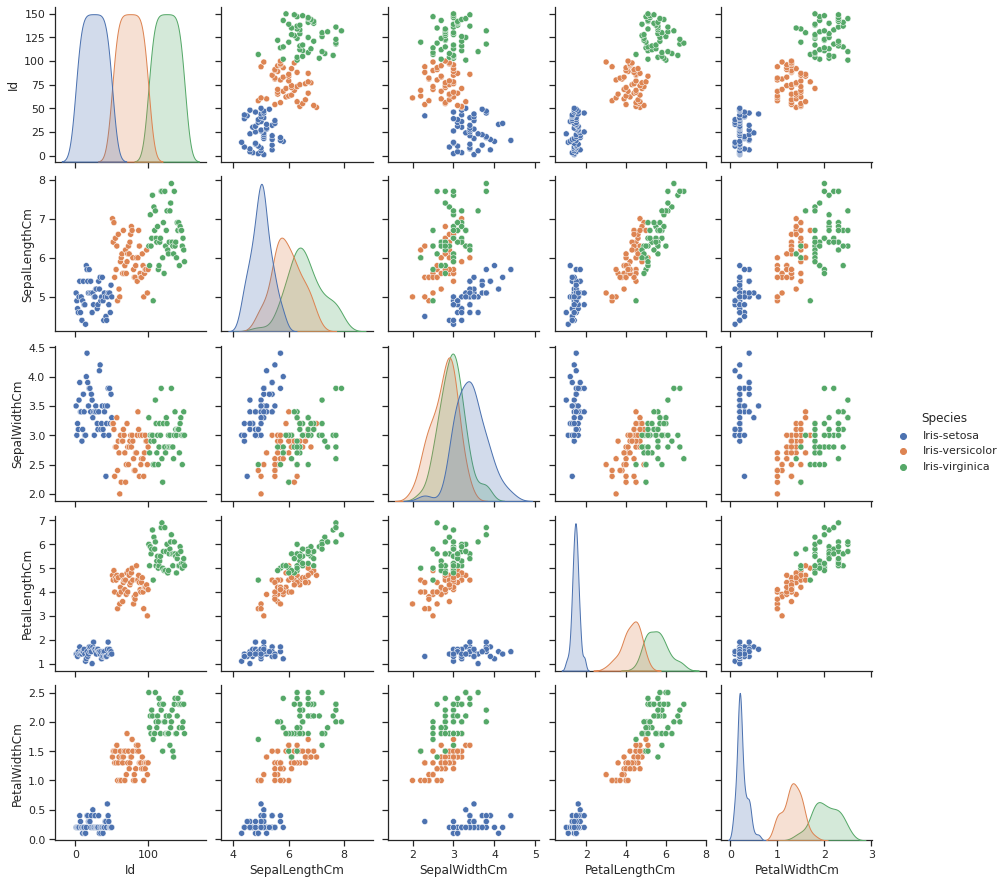

In [ ]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
"""iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.keys()[1:5])
print(iris_dataframe)
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8)"""
# Empleamos la libreria seaborn para visualizar de mejor manera el dataset y de esta manera empezar a analizar que se puede hacer con el
sns.set_theme(style="ticks")
sns.pairplot(iris_dataset, hue="Species")

Nota: Podemos observar en el dataset, que una de las clases (azul/iris-setosa) se encuentra separada, lo cual indica que es facil realizarle una clasificacion a diferencia de las otras dos clases (iris-versicolor/iris-virginica). Por otro lado tambien se observa que su comportamiendo tiende a ser lineal, sobre todo con la caracteristica "PetalWidthCm"

In [ ]:
# Se imprimen las caracteristicas del dataset, y se estableces como arrays todos los names del dataset
print("Feature names:\n", iris_dataset.keys())

Feature names:
 Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


Ahora que tenemos conocimiento del dataset, buscamos diferentes metodos de clasificacion/Regresion y comprobar que tan bien se entrenan los datos, si clasifican de forma correcta y ademas, observar como es el comportamiento de la complejidad en cada metodo empleado.

## k-Nearest Neighbors



En este caso utilizaremos el metodo de clasificacion k-Nearest Neighbors, el cual es un metodo de clasificacion.

Primero observamos el tamaño de las matrices creadas con el train split. De esta manera sabremos la dimension tanto de las matrices de entrenamiento como de testeo

In [ ]:
print("Training feature matrix size: ", X.shape)
print("Training feature matrix size: ", X_train.shape)
#print(X_train.head())
print("Test feature matrix size: ", X_test.shape)
#print(X_test.head())
print("Training target vector size: ", y_train.shape)
#print(y_train.head())
print("Test target vector size: ", y_test.shape)
#print(y_test.head())

Training feature matrix size:  (150, 4)
Training feature matrix size:  (105, 4)
Test feature matrix size:  (45, 4)
Training target vector size:  (105,)
Test target vector size:  (45,)


Creamos una variable "model_knn" en la cual estara implementado el KNN, y est sera entrenado con el ".fit" con los datos de entrenamiento respectivos.

Por otro lado, se establece en 1 el n_neighbors el cual es el Hiperparametro del KNN (A veces no se tiene en claro cual es el HyperParametro, asi que se emplean otros metodos para obtenerlo, pero en este caso se sabe cual es). 

Esto significa que estamos con la complejidad maxima posible en el KNN y entre mas grande el numero de n_neighbors menos complejo es el sistema, pero no significa que vaya a entrenar mejor. Esto lo observaremos mas adelante.

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors =1)
model_knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

Ahora buscamos realizar la predicion, para ello se crea un array nuevo llamado "X_new" y se emplea el ".predict" para predecir los datos ingresados en el nuevo array y observar si la red entreno de manera correcta

In [ ]:
# Make a prediction

X_new = np.array([[5.1,	3.2,	1.5,	0.5]])
print("X_new.shape:", X_new.shape)
prediction = model_knn.predict(X_new)
print(prediction)
print("Prediction:",  y[1][prediction])

X_new.shape: (1, 4)
[0]
Prediction: Index(['Iris-setosa'], dtype='object')


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


Ahora evaluamos el rendimiento del modelo, viendo asi el puntaje en la predicion.
Podmeos observar que es del 98%, el cual es muy preciso. Es importante recalcar, que esta prediccion se comparo con los datos de testeo.

In [ ]:
# Evaluate the model
y_pred = model_knn.predict(X_test)
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.98


Ahora veamos el puntaje en el entrenamiento de los datos y los datos de testeo.

Podemos observar que en el entrenamiento tenemos un 100% de puntaje y en el de testeo 98%. Esto nos induce a pensar que la red probablemente tuvo un Overfiting o que los datos estan perfectamente entrenados.

In [ ]:
print("Traning set score: {:.2f}".format(model_knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model_knn.score(X_test, y_test)))

Traning set score: 1.00
Test set score: 0.98


Classification


In [ ]:
#Instalamos el mglearn para visualizacion
!pip install mglearn

ahora miramos bien, si esta clasificacion se realiza de forma correcta, y para ello empleamos herramientas de visualizacion. En este caso con el uso del mglearn y estableciendo un ciclo "for" buscamos plotear con diferentes numeros de "n_neighbors" para asi observar como su nivel de complejidad hace cambiar el resultado.

Podemos observar que con 1 solo neighbor la red es mucho mas precisa y busca clasificar mejor los datos, a diferencia del uso de 3 y 9 neighbors en donde la clasificacion es mas sencilla, ello implica que a menor complejidad, la clasificacion es menos rigurosa y se puede saltar datos que pueden estar muy cerca unos de otros.

(105, 2)
(105, 2)


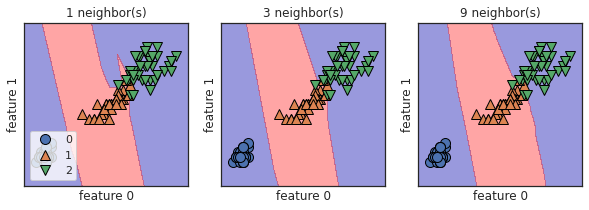

In [ ]:
import mglearn
dataset = np.empty([X_train.shape[0],2], dtype=float)
dataset[:,0] = X_train.iloc[:,2].values
dataset[:,1] = X_train.iloc[:,3].values
print(dataset.shape)

X, y =dataset, y_train
#X, y = mglearn.datasets.make_forge()
print(X.shape)
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

Ahora buscamos observar el comportamiento de la precision del Train y del Test en terminos de complejidad. Para ello se crean dos Arrays vacios (training_accuracy/test_accuracy) en donde vamos a poner los scores de cada uno de ellos con respecto a su nivel de complejidad. Podemos observar que el rango de los datos va de 1 a 30, lo que significa que el hiperparametro va a ir cambiando de 1 a 30 gracias al ciclo for, y los scores se iran guardando en los arrays anteriormente mencionados.
Por ultimo de plote la informacion. 

Podemos observar que con un n_neighbors = 1 el train y el test son de 1.00 y 0.98 como anteriormente lo observamos, pero a medidad que vamos aumentando el hiperparametro, el desempeño del train disminuye pero el del test se mantiene constante. Tambien podemos observar que el train oscila entre 0.96 y 0.97 en desde 3 hasta 13 del n_neighbors a diferencia del test, que se mantiene constante hasta el n_neighbors = 25.

Podemos decir, que entre mas aumentemos el n_neighbors, osea, entre mas disminuyamos la complejidad menos desempeño vamos obteniendo, lo cual indica que el punto optimo de trabajo es con el n_neighbors = 1, osea el mas complejo

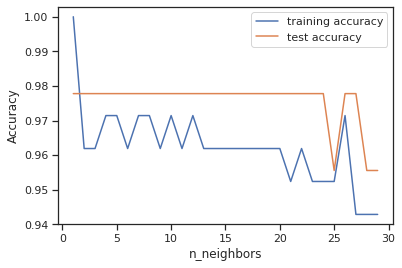

In [ ]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings =range(1,30)
#vector = [x for x in range(21, 0, -1)]
#print(vector)
for n_neighbors in neighbors_settings:
    #print(n_neighbors)
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

#print('training_accuracy: ', training_accuracy)
#print('test_accuracy: ', test_accuracy)
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

y ademas, podemos observar gracias a un metodo de visualizacion de datos, el cual se llama matriz de confusion, si estas prediciones fueron correctas, que tan correctas fueron y tambien verificar la precision, recall y accuarcy

podemos observar que obtuvo muchos true positives, los cuales son los datos vistos en la matriz de forma diagonal y significan que realizaron las prediciones de forma correcta, a la clase correcta. Pero hubo 1 falso positivo con la tercera clase, lo cual establece lo anterior visto que su precision no fue del

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


,ACCURACY,PRECISION,RECALL
results,0.9778,0.9778,0.9778


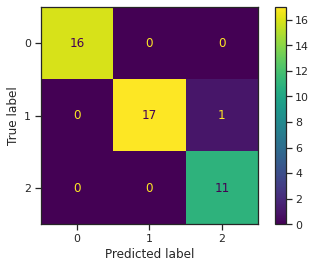

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score
#from sklearn.metrics import average_precision_score

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)
plot_confusion_matrix(clf, X_test, y_test) 
#Reacall, Accuracy, Precision, Recall

accuracy = accuracy_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test, average='micro')
precision = precision_score(y_test, y_pred_test, average='micro')

subgroup_performance_metrics = {
    'ACCURACY': accuracy,
    'PRECISION': precision, 
    'RECALL': recall
   
}
performance_df = pd.DataFrame(subgroup_performance_metrics, index=["results"])
pd.options.display.float_format = '{:,.4f}'.format
performance_df

##Logisitic - l1 - Lasso Regression

La utilidad de L1 es que puede llevar los coeficientes de características a 0, creando un método para la selección de características. En el siguiente código, ejecutamos una regresión logística con una penalización L1 ,Donde C es igual a 10. En caso de que el valor de C disminuya, nuestro modelo deberia de tener un mejor rendimiento

In [ ]:
clf_l1_LR = LogisticRegression(C=10, penalty="l1", tol=0.01, solver="saga")
clf_l1_LR.fit(X_train, y_train)
_predict_clf_l1_LR = clf_l1_LR.predict(X_new)
#print(all_predict)

Y = iris_dataset['Species']
y = pd.factorize(Y)
#print("First target values: \n", Y.loc[30:70])

#print("Datos de Validacion\n", y_test)
print(_predict_clf_l1_LR)
#print(y)
print("Prediction:", y[1][_predict_clf_l1_LR],"\n \n")

[0]
Prediction: Index(['Iris-setosa'], dtype='object') 
 



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


Training set score: 0.98
Test set score: 0.96


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


,ACCURACY,PRECISION,RECALL
results,0.9556,0.9556,0.9556


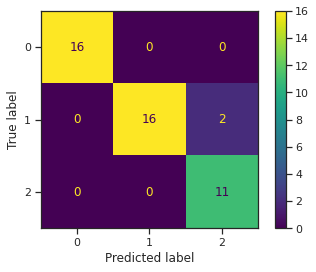

In [ ]:
print("Training set score: {:.2f}".format(clf_l1_LR.score(X_train, y_train)))
print("Test set score: {:.2f}".format(clf_l1_LR.score(X_test, y_test)))
_predict_clf_l1_LR = clf_l1_LR.predict(X_test)

plot_confusion_matrix(clf_l1_LR, X_test, y_test) 
#Reacall, Accuracy, Precision, Recall

accuracy = accuracy_score(y_test, _predict_clf_l1_LR)
recall = recall_score(y_test, _predict_clf_l1_LR, average='micro')
precision = precision_score(y_test, _predict_clf_l1_LR, average='micro')

subgroup_performance_metrics = {
    'ACCURACY': accuracy,
    'PRECISION': precision, 
    'RECALL': recall
   
}
performance_df = pd.DataFrame(subgroup_performance_metrics, index=["results"])
pd.options.display.float_format = '{:,.4f}'.format
performance_df

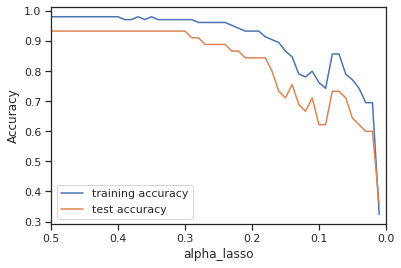

In [ ]:
l1_lasso_training_accuracy = []
l1_lasso_test_accuracy = []
# try n_neighbors from 1 to 10
l1_laso_settings =np.arange(0.01, 20, 0.01)
vector = [x for x in np.arange(0.01, 20, 0.01)]
#print(vector)
for l1_lasso in l1_laso_settings:
    #print(alpha_lasso)
    # build the model
    clf_l1_LR = LogisticRegression(C=l1_lasso, penalty="l1", tol=0.01, solver="saga")
    clf_l1_LR.fit(X_train, y_train)    
    # record training set accuracy
    l1_lasso_training_accuracy.append(clf_l1_LR.score(X_train, y_train))
    # record generalization accuracy
    l1_lasso_test_accuracy.append(clf_l1_LR.score(X_test, y_test))

#print('training_accuracy: ', training_accuracy)
#print('test_accuracy: ', test_accuracy)
plt.plot(l1_laso_settings, l1_lasso_training_accuracy, label="training accuracy")
plt.plot(l1_laso_settings, l1_lasso_test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("alpha_lasso")
plt.xlim(0.5, 0)
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.37
Test accuracy of l1 logreg with C=0.001: 0.24
Training accuracy of l1 logreg with C=1.000: 0.98
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.98
Test accuracy of l1 logreg with C=100.000: 0.96


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


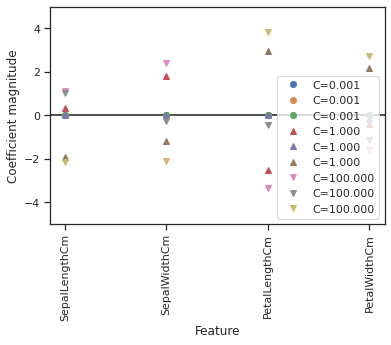

In [ ]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, solver='saga', penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(X_train.shape[1]),features_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)
plt.legend(numpoints=1)

##Logistic -l2 - Ridge - Regression

En este apartado aplicamos la regresión lógistica ingresando como hiperparámetros.

**C = 30**

Es el imperparametro donde entre más pequeño sea mayor es la regularización de la complejidad del modelo.

**penalty = "l2"** 

Indica que es una regularización tipo ridge


**Tol**

Tolerancia para los criterios de parada.

**Solver**

Algoritmo a utilizar en el problema de optimización. El valor predeterminado es 'lbfgs'. Para elegir un solucionador, es posible que desee considerar los siguientes aspectos:

Para conjuntos de datos pequeños, 'liblinear' es una buena opción, mientras que 'sag' y 'saga' son más rápidos para los grandes;

Para problemas multiclase, solo 'newton-cg', 'sag', 'saga' y 'lbfgs' manejan la pérdida multinomial;

'liblinear' se limita a esquemas de uno contra el resto.



In [ ]:
#Creamos el objeto de modelo de regresion
clf_l2_LR = LogisticRegression(C=30, penalty="l2", tol=0.01, solver="saga")
#Entrenamos el modelo
clf_l2_LR.fit(X_train, y_train)
#Obtenemos la predicción del modelo dando una muestra en este caso la muestra
#No descomentar X_new. Esta ya ha sido creada anteriormente
#X_new = np.array([[5.1,	3.2,	1.5,	0.5]])
#
_predict_clf_l2_LR = clf_l2_LR.predict(X_new)
# Garantizamos que no se haya modificado en el proceso nuestro y-Real
Y = iris_dataset['Species']
#Este método es útil para obtener una representación numérica de un
#matriz cuando todo lo que importa es identificar valores distintos. factorizar
#está disponible como una función de nivel superior
y = pd.factorize(Y)
#Imprimimos la predicción realizada por el modelo en un valor numérico
print(_predict_clf_l2_LR)
#Consultamos en nuestro Y-real a qué variable categorica representa el y predicho anteriormente
print("Prediction:", y[1][_predict_clf_l2_LR],"\n \n")

[0]
Prediction: Index(['Iris-setosa'], dtype='object') 
 



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


Posteriormente vamos a calcular el desempeño total del modelo tanto con los valores de entrenemiento como con los valores de test.

Posteriormente realizaremos la matriz de confusión

Training set score: 0.98
Test set score: 0.96


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


,ACCURACY,PRECISION,RECALL
results,0.9556,0.9556,0.9556


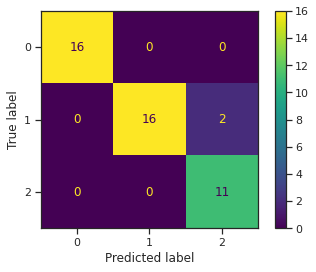

In [ ]:
#Imprimimos el desempeño con los valores de entrenamiento
print("Training set score: {:.2f}".format(clf_l2_LR.score(X_train, y_train)))
#Imprimimos el desempeño con los valores de test
print("Test set score: {:.2f}".format(clf_l2_LR.score(X_test, y_test)))
# Imprimimos la predición con con nuestros datos de entrenamiento de prueba X-test
_predict_clf_l2_LR = clf_l2_LR.predict(X_test)
# Utilizamos la función plot_confusion_matrix, para crear la matriz de confusion
#Le pasamos nuestro clasificador tipo ridge junto con los datos de X-test y y-test
plot_confusion_matrix(clf_l2_LR, X_test, y_test) 

#Reacall, Accuracy, Precision, Recall
#Primero calculamos la exactitud del modelo pasandole el y-test de prueba.
#Y el y predicho por nuestro clasificador, y de esta misma forma con la recuperacion y
#y la recuperación
accuracy = accuracy_score(y_test, _predict_clf_l2_LR)
recall = recall_score(y_test, _predict_clf_l2_LR, average='micro')
precision = precision_score(y_test, _predict_clf_l2_LR, average='micro')
#Creamos una estructura de datos clave valor
subgroup_performance_metrics = {
    'ACCURACY': accuracy,
    'PRECISION': precision, 
    'RECALL': recall
   
}
#Creamos un objeto de DataFRame que nos permite cvisualizar gráficamente la matriz
performance_df = pd.DataFrame(subgroup_performance_metrics, index=["results"])
pd.options.display.float_format = '{:,.4f}'.format
performance_df


##RESULTADO#
#Observando el desempeño con los valores de testeo y de entrenamiento
#Se podría pensar que el modelo está sub entrenado debido a que es un desempeño 
# alto y no hay mayor diferencia entre los valores
#Sin embargo al observar la matriz de confusión se puede ver que efectivamente
#El modelo ha tenido un desempeño alto en la predicción se considera que pueda
#tener un valor igual con valores que el modelo nunca haya visto.

A continuación se observará el desempeño del modelo, utilizando variando nuestro hiperparametro C con una regularización tipo ridge. Este gráfico mostrará el desempeño para los datos de entrenamiento y los datos de testeo.

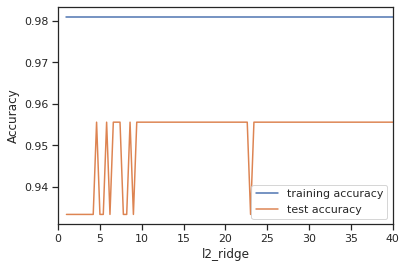

In [ ]:
#Declaramos  los arreglaos que guardaran los valores de la exactitud
l2_training_accuracy = []
l2_test_accuracy = []
# Creamos un vector de valores entre 1 a 100 incrementando en 0.4
l2_ridge_settings =np.arange(1, 100,0.4)

for l2_ridge in l2_ridge_settings:
     
    # Creamos nuestro regresor logistico
    clf_l2_LR = LogisticRegression(C=l2_ridge, penalty="l2", tol=0.01, solver="saga")
    clf_l2_LR.fit(X_train, y_train)
    
    # record training set accuracy
    l2_training_accuracy.append(clf_l2_LR.score(X_train, y_train))
    # record generalization accuracy
    l2_test_accuracy.append(clf_l2_LR.score(X_test, y_test))


plt.plot(l2_ridge_settings, l2_training_accuracy, label="training accuracy")
plt.plot(l2_ridge_settings, l2_test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("l2_ridge")
plt.xlim(0, 40)
plt.legend()

## Al ver la la gráfica de desempeño del modelo se puede observar que
#En ambos casos es constante por ende podríamos decir que el modelo está subentrendado
#Y debido a los datos que posemos puede realizr una separación lineal, nuevamente
#Se esperaría observar como sería este desempeño con una mayor cantidad de datos.

Finalmente se observará el comportamiento de los coeficientes a medida
que variamos los valores de C

Training accuracy of l1 logreg with C=0.001: 0.70
Test accuracy of l1 logreg with C=0.001: 0.60
Training accuracy of l1 logreg with C=1.000: 0.98
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.98
Test accuracy of l1 logreg with C=100.000: 0.96


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


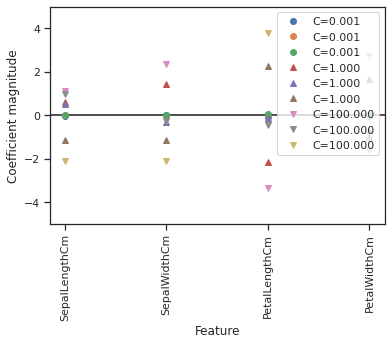

In [ ]:
#Definimos nuestras Features
features_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
#Recorreremos los dos arreglos, asigando o-0.001 | ^-1 | v-100 para los diferentes
#Valores de C. Esto permitirá plottear los coeficientes diferenciandolos en la gráfica
#Calculando la regresión para distintos valores de C mediante una regularizació tipo ridge
#
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    #objeto del regresor
    lr_l2 = LogisticRegression(C=C, solver='saga', penalty="l2").fit(X_train, y_train)
    #Imprimimos el  desempeño para este valor de C con los datos de entrenamienot
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l2.score(X_train, y_train)))
    #Imprimimos el  desempeño para este valor de C con los datos de prueba
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format( C, lr_l2.score(X_test, y_test)))
    #agregamos los marcadores
    plt.plot(lr_l2.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(X_train.shape[1]), features_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=1)

## Al final se puede observar que entre más peuqeño sea C mayor hace que lo coe-
##eficientes sean cercanos a cero, facilitando una labor de reducción de dimensionalidad


##Conclusiones

* Regularización tipo ridge en un regreso logístico permitió clasificar correctamente las muestras. Sin embargo se considera que debido a que se poseía un dataset pequeño, el modelo ha entrenado eficientemente.
Y efectivamente esto se ve con los valores de Accuracy previamente. Además que se poseían dimensiones facilmente separabbles linealmente. Puede que ante una mayor variabilidad de los datos sea mayor el sesgo en la predicción.
